In [1]:
# importing necessary libraries

import pandas as pd
import zipfile
from io import BytesIO

In [2]:
filepath = r"C:\Users\MAX TECH STORE\Documents\DataScienceProjects\Personal Projects\Heart project\Heart dataset.zip"

In [3]:
data = zipfile.ZipFile(filepath, 'r')
type(data)

zipfile.ZipFile

In [4]:
data.namelist()

['heart.csv']

In [5]:
heart = data.read('heart.csv')
type(heart)

bytes

In [6]:
archive = BytesIO(heart)
type(archive)

_io.BytesIO

In [7]:
df = pd.read_csv(archive)

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# Checking for appropriate info

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [9]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


<Axes: ylabel='Density'>

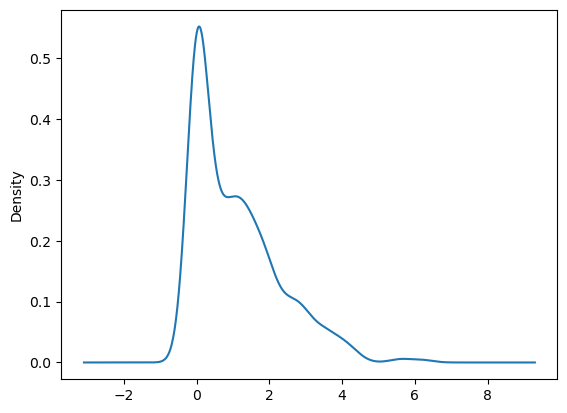

In [11]:
df.oldpeak.plot(kind='density')

<Axes: ylabel='Density'>

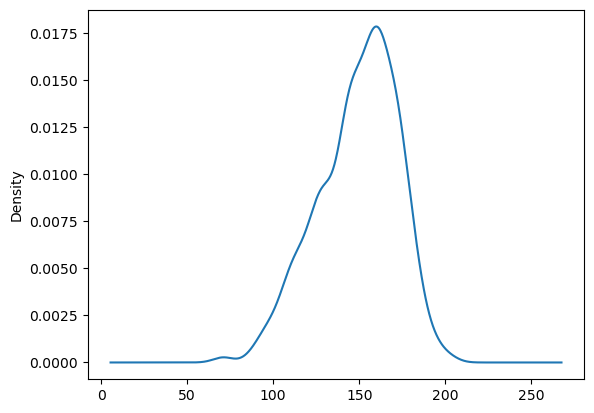

In [12]:
df.thalach.plot(kind='density')

## Data Transformation stages

### 1. Data Rescaling
### 2. Data Standardization
### 3. Data Normalization
### 4. Data Binarization

### Data Rescaling

In [13]:
from sklearn.preprocessing import MinMaxScaler

df_array = df.values
df_array

array([[52.,  1.,  0., ...,  2.,  3.,  0.],
       [53.,  1.,  0., ...,  0.,  3.,  0.],
       [70.,  1.,  0., ...,  0.,  3.,  0.],
       ...,
       [47.,  1.,  0., ...,  1.,  2.,  0.],
       [50.,  0.,  0., ...,  0.,  2.,  1.],
       [54.,  1.,  0., ...,  1.,  3.,  0.]])

In [14]:
# Divide the values into two

X = df_array[:,0:13]
Y = df_array[:, 13]

In [15]:
from numpy import set_printoptions

In [16]:
scaler = MinMaxScaler(feature_range=(0,1))
rescaledx = scaler.fit_transform(X)
set_printoptions(precision=2)
print(rescaledx)

[[0.48 1.   0.   ... 1.   0.5  1.  ]
 [0.5  1.   0.   ... 0.   0.   1.  ]
 [0.85 1.   0.   ... 0.   0.   1.  ]
 ...
 [0.38 1.   0.   ... 0.5  0.25 0.67]
 [0.44 0.   0.   ... 1.   0.   0.67]
 [0.52 1.   0.   ... 0.5  0.25 1.  ]]


In [17]:
# Create a new dataframe using the rescaled dataset

rescaledxdf = pd.DataFrame(rescaledx, columns=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'])
rescaledxdf.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.479167,1.0,0.0,0.292453,0.196347,0.0,0.5,0.740458,0.0,0.161290,1.0,0.50,1.000000
1,0.500000,1.0,0.0,0.433962,0.175799,1.0,0.0,0.641221,1.0,0.500000,0.0,0.00,1.000000
2,0.854167,1.0,0.0,0.481132,0.109589,0.0,0.5,0.412214,1.0,0.419355,0.0,0.00,1.000000
3,0.666667,1.0,0.0,0.509434,0.175799,0.0,0.5,0.687023,0.0,0.000000,1.0,0.25,1.000000
4,0.687500,0.0,0.0,0.415094,0.383562,1.0,0.5,0.267176,0.0,0.306452,0.5,0.75,0.666667


In [18]:
# Add the target variable
rescaledxdf["target"] = Y

In [19]:
rescaledxdf.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.479167,1.0,0.0,0.292453,0.196347,0.0,0.5,0.740458,0.0,0.161290,1.0,0.50,1.000000,0.0
1,0.500000,1.0,0.0,0.433962,0.175799,1.0,0.0,0.641221,1.0,0.500000,0.0,0.00,1.000000,0.0
2,0.854167,1.0,0.0,0.481132,0.109589,0.0,0.5,0.412214,1.0,0.419355,0.0,0.00,1.000000,0.0
3,0.666667,1.0,0.0,0.509434,0.175799,0.0,0.5,0.687023,0.0,0.000000,1.0,0.25,1.000000,0.0
4,0.687500,0.0,0.0,0.415094,0.383562,1.0,0.5,0.267176,0.0,0.306452,0.5,0.75,0.666667,0.0


### Standardization

In [20]:
from sklearn.preprocessing import StandardScaler

standardx_array = rescaledxdf.values
standardx_array

array([[0.48, 1.  , 0.  , ..., 0.5 , 1.  , 0.  ],
       [0.5 , 1.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.85, 1.  , 0.  , ..., 0.  , 1.  , 0.  ],
       ...,
       [0.38, 1.  , 0.  , ..., 0.25, 0.67, 0.  ],
       [0.44, 0.  , 0.  , ..., 0.  , 0.67, 1.  ],
       [0.52, 1.  , 0.  , ..., 0.25, 1.  , 0.  ]])

In [21]:
X = standardx_array[:, 0:13]
Y = standardx_array[:, 13]

In [22]:
scaler = StandardScaler().fit(X)
data = scaler.transform(X)
set_printoptions(precision=2)
print(data)

[[-0.27  0.66 -0.92 ...  1.    1.21  1.09]
 [-0.16  0.66 -0.92 ... -2.24 -0.73  1.09]
 [ 1.72  0.66 -0.92 ... -2.24 -0.73  1.09]
 ...
 [-0.82  0.66 -0.92 ... -0.62  0.24 -0.52]
 [-0.49 -1.51 -0.92 ...  1.   -0.73 -0.52]
 [-0.05  0.66 -0.92 ... -0.62  0.24  1.09]]


In [23]:
# Create a new dataframe using the standardized dataset

standard_df = pd.DataFrame(data, columns=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'])

# Add the target variable to the dataframe

standard_df["target"] = Y

In [24]:
standard_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.268437,0.661504,-0.915755,-0.377636,-0.659332,-0.418878,0.891255,0.821321,-0.712287,-0.060888,0.995433,1.209221,1.089852,0.0
1,-0.158157,0.661504,-0.915755,0.479107,-0.833861,2.387330,-1.004049,0.255968,1.403928,1.727137,-2.243675,-0.731971,1.089852,0.0
2,1.716595,0.661504,-0.915755,0.764688,-1.396233,-0.418878,0.891255,-1.048692,1.403928,1.301417,-2.243675,-0.731971,1.089852,0.0
3,0.724079,0.661504,-0.915755,0.936037,-0.833861,-0.418878,0.891255,0.516900,-0.712287,-0.912329,0.995433,0.238625,1.089852,0.0
4,0.834359,-1.511706,-0.915755,0.364875,0.930822,2.387330,0.891255,-1.874977,-0.712287,0.705408,-0.624121,2.179817,-0.522122,0.0


### Normalization

In [25]:
from sklearn.preprocessing import Normalizer

In [26]:
normal_arr = standard_df.values

In [27]:
X = normal_arr[:, 0:13]
Y = normal_arr[:, 13]

In [28]:
normalizer = Normalizer().fit(X).transform(X)

In [29]:
set_printoptions(precision=2)
normalizer

array([[-0.1 ,  0.24, -0.33, ...,  0.36,  0.44,  0.39],
       [-0.03,  0.15, -0.2 , ..., -0.49, -0.16,  0.24],
       [ 0.39,  0.15, -0.21, ..., -0.51, -0.17,  0.25],
       ...,
       [-0.27,  0.21, -0.3 , ..., -0.2 ,  0.08, -0.17],
       [-0.16, -0.49, -0.3 , ...,  0.32, -0.24, -0.17],
       [-0.02,  0.23, -0.31, ..., -0.21,  0.08,  0.37]])

In [30]:
# Create the dataframe with the normalized dataset

normalized_df = pd.DataFrame(normalizer, columns=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'])

# Add the target variable

normalized_df["target"] = Y

normalized_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.096601,0.238052,-0.329547,-0.135897,-0.237270,-0.150739,0.320731,0.295564,-0.256327,-0.021912,0.358221,0.435155,0.392198,0.0
1,-0.034753,0.145357,-0.201225,0.105277,-0.183230,0.524584,-0.220626,0.056246,0.308494,0.379515,-0.493018,-0.160841,0.239480,0.0
2,0.391259,0.150775,-0.208725,0.174293,-0.318239,-0.095474,0.203141,-0.239025,0.319993,0.296628,-0.511394,-0.166836,0.248407,0.0
3,0.253103,0.231229,-0.320103,0.327192,-0.291477,-0.146419,0.311539,0.180683,-0.248981,-0.318905,0.347955,0.083411,0.380959,0.0
4,0.181009,-0.327955,-0.198667,0.079157,0.201935,0.517915,0.193352,-0.406764,-0.154526,0.153034,-0.135399,0.472897,-0.113271,0.0


<Axes: ylabel='Density'>

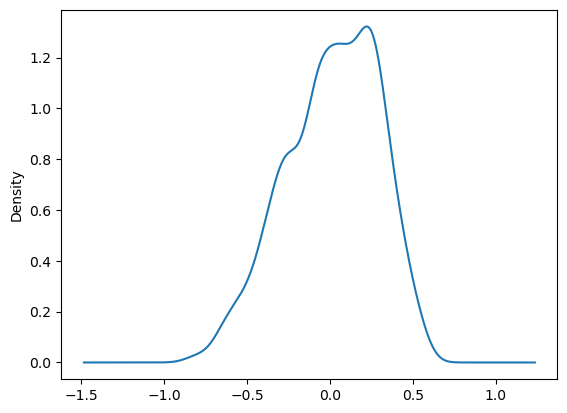

In [31]:
normalized_df.thalach.plot(kind='density')

<Axes: ylabel='Density'>

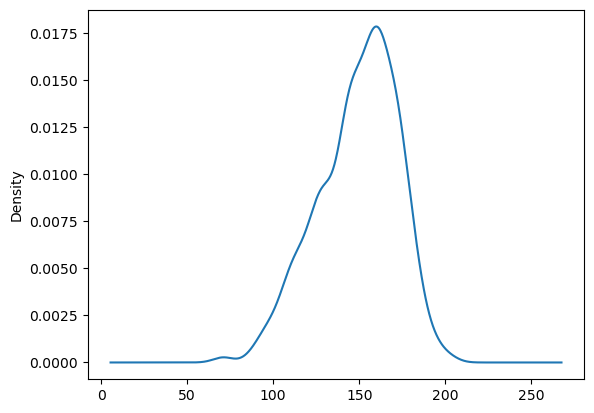

In [32]:
df.thalach.plot(kind='density')

<Axes: ylabel='Density'>

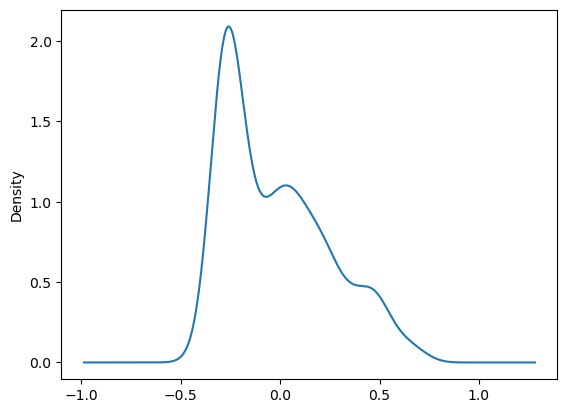

In [33]:
normalized_df.oldpeak.plot(kind='density')

<Axes: ylabel='Density'>

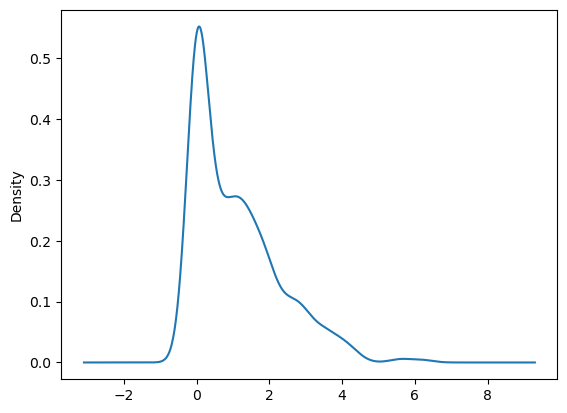

In [34]:
df.oldpeak.plot(kind='density')

In [35]:
normalized_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.096601,0.238052,-0.329547,-0.135897,-0.237270,-0.150739,0.320731,0.295564,-0.256327,-0.021912,0.358221,0.435155,0.392198,0.0
1,-0.034753,0.145357,-0.201225,0.105277,-0.183230,0.524584,-0.220626,0.056246,0.308494,0.379515,-0.493018,-0.160841,0.239480,0.0
2,0.391259,0.150775,-0.208725,0.174293,-0.318239,-0.095474,0.203141,-0.239025,0.319993,0.296628,-0.511394,-0.166836,0.248407,0.0
3,0.253103,0.231229,-0.320103,0.327192,-0.291477,-0.146419,0.311539,0.180683,-0.248981,-0.318905,0.347955,0.083411,0.380959,0.0
4,0.181009,-0.327955,-0.198667,0.079157,0.201935,0.517915,0.193352,-0.406764,-0.154526,0.153034,-0.135399,0.472897,-0.113271,0.0


## Machine Learning Prediction

In [36]:
# Create the input and output variable

X = normalized_df.drop("target", axis=1)
Y = normalized_df["target"]

In [63]:
# Import the regression model

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [54]:
# Import the train_test_split function

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5)

In [55]:
# Fit in the model into the dataset

clf.fit(X_train, Y_train)

RandomForestClassifier()

In [56]:
# Make a prediction

Y_preds = clf.predict(X_test)
Y_preds

array([0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0.,
       0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 1., 0.

In [57]:
# Evaluate the model on the dataset
clf.score(X_train, Y_train)

1.0

In [58]:
# Evaluate the model on the test dataset

clf.score(X_test, Y_test)

0.9805068226120858

## Checking for important metrics

In [59]:
# Check for accuracy score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(accuracy_score(Y_test, Y_preds))

0.9805068226120858


In [60]:
print(classification_report(Y_test, Y_preds))

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98       265
         1.0       0.96      1.00      0.98       248

    accuracy                           0.98       513
   macro avg       0.98      0.98      0.98       513
weighted avg       0.98      0.98      0.98       513



In [61]:
print(confusion_matrix(Y_test, Y_preds))

[[255  10]
 [  0 248]]


In [62]:
# Saving the model

import pickle
pickle.dump(clf, open("RandomForestClassification Model on Heart Disease.pkl", "wb"))

In [64]:
pip install pickle

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle
